<a href="https://colab.research.google.com/github/zhangxs131/TTS_trying/blob/main/tensorflowTTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



使用tensoflowTTS 文字转语言库实现

*    源项目colab地址：https://colab.research.google.com/drive/1akxtrLZHKuMiQup00tzO2olCaN-y3KiD?usp=sharing
*    Github地址：https://github.com/TensorSpeech/TensorflowTTS


##安装依赖

In [1]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10679, done.
remote: Total 10679 (delta 0), reused 0 (delta 0), pack-reused 10679
Receiving objects: 100% (10679/10679), 133.52 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (5163/5163), done.
Processing /content/TensorFlowTTS
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
     |████████████████████████████████| 235 kB 48.6 MB/s 
     |████████████████████████████████| 212 kB 53.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ...

In [2]:
!pip install git+https://github.com/repodiac/german_transliterate.git

  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-req-build-w4riqif7
  Running command git clone -q https://github.com/repodiac/german_transliterate.git /tmp/pip-req-build-w4riqif7
     |████████████████████████████████| 101 kB 5.5 MB/s 
  Created wheel for german-transliterate: filename=german_transliterate-0.1.3-py3-none-any.whl size=20829 sha256=04dca056b0548a501369f312af5e295b22e73ceb8fee0585f8e5216ee014193d
  Stored in directory: /tmp/pip-ephem-wheel-cache-l2pxf1ei/wheels/77/17/55/6c6d2d33bd2b3b8a3741e12b17f0b18278861f64858bbcc228
Successfully built german-transliterate


In [3]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 12.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.7.0 which is incompatible.


##下载tensorflowTTS中不同的预训练模型

###MelGAN+STFT Loss

In [4]:
print("Downloading MelGAN-STFT model...")
!gdown --id {"1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys"} -O melgan.stft-2M.h5
!gdown --id {"1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg"} -O melgan.stft_config.yml

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys
To: /content/melgan.stft-2M.h5
100% 17.1M/17.1M [00:00<00:00, 164MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg
To: /content/melgan.stft_config.yml
100% 1.77k/1.77k [00:00<00:00, 2.95MB/s]


In [5]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


###Tacotron 2

In [6]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en", name="tacotron2")

Downloading:   0%|          | 0.00/128M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

###FastSpeech

In [ ]:
fastspeech = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech-ljspeech-en", name="fastspeech")

###FastSpeech2

In [ ]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en", name="fastspeech2")

###MelGAN Original

In [7]:
melgan = TFAutoModel.from_pretrained("tensorspeech/tts-melgan-ljspeech-en", name="melgan")

Downloading:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

###MelGAN SIFT

In [ ]:
melgan_stft_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan_stft/conf/melgan_stft.v1.yaml')
melgan_stft = TFAutoModel.from_pretrained(
    config=melgan_stft_config,
    pretrained_path="melgan.stft-2M.h5",
    name="melgan_stft"
)

###Multi-band MelGAN

In [ ]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-ljspeech-en", name="mb_melgan")

##Inference

In [8]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en")

Downloading:   0%|          | 0.00/3.57k [00:00<?, ?B/s]

In [9]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

#可视化attention
def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()


#可视化梅尔语图
def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [10]:
#input_text = "Bill got in the habit of asking himself “Is that thought true?” And if he wasn’t absolutely certain it was, he just let it go."
input_text="Ted and Janet often played house in this way, setting up a sort of one-floor apartment on the back porch, with different rooms marked off by sticks laid on the floor of the porch. In each of these “rooms” were put different pieces of furniture. Most of the furniture was just boxes, or perhaps an old broken chair or two, or even some sticks and boards. But to the Curlytops the playhouse was very real. Only Trouble could not “pretend” as well as could his older brother and sister. Ted liked to play house with Janet, even if he was a boy."

In [11]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MELGAN

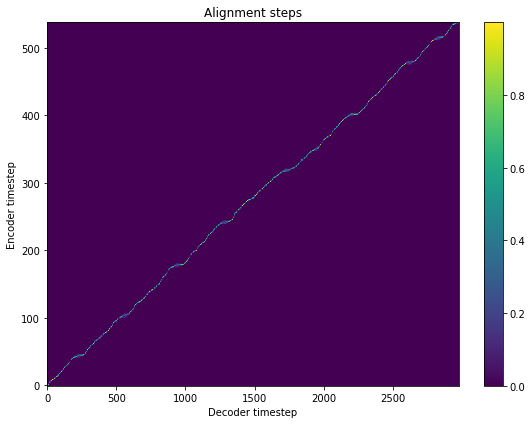

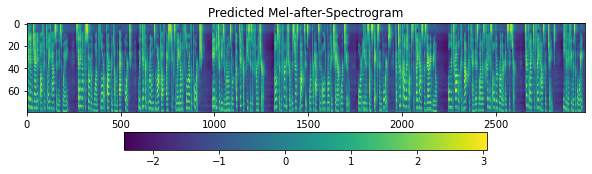

In [12]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan, "TACOTRON", "MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (b) Tacotron2 + MELGAN-STFT

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan_stft, "TACOTRON", "MELGAN-STFT")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (c) Tacotron2 + MB-MELGAN

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (d) FastSpeech + MB-MELGAN

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, mb_melgan, "FASTSPEECH", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (e) FastSpeech + MELGAN-STFT

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan_stft, "FASTSPEECH", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (f) FastSpeech + MELGAN


In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan, "FASTSPEECH", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (g) FastSpeech2 + MB-MELGAN

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (h) FastSpeech2 + MELGAN-STFT

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan_stft, "FASTSPEECH2", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (i) FastSpeech2 + MELGAN

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan, "FASTSPEECH2", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)